# Importing Libraries

In [5]:
import pandas as pd 
import requests 
import matplotlib.pyplot as plt
import seaborn as sns 
from bs4 import BeautifulSoup
import time
import random 
import altair as alt 


# Setting up HTTP header

In [7]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.4 Safari/605.1.15',
           'Accepted-Language':'en-GB,en;q=0.9',
           'Accepted-Encoding':'gzip, deflate, br',
           'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',          }

# Webscraping 
Based on the large number of bestseller books displayed for each year, the scrapping was limited to only 9 books/year, thus the total number of books for this sample is 99 books. This was done to reduce the number of requests sent to the amazon website. Sending multiple requests raised captcha errors 

In [9]:
years = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]

#obtaining links for each year
links  = []
for year in years:
    url = f'https://www.amazon.com/gp/bestsellers/{year}/books'
    links.append(url)

#contains the title and author of bestseller books
book_info = []

#contains the prices 
price_info = []

#contains the title of bestseller books
book_title = []

#contains the href tags of bestseller books
bk_href = []

#contains names of each book between 2009-2019 
book_name = []

#contains names of corresponding authors between 2009-2019 
book_author = []

#
for link in links:

    #Sending request to get each page/link (from 2009 to 2019)
    url = link
    r = requests.get(url,headers=headers)
    
    #Time delay to regulate the number of requests sent to url
    time.sleep(5)
    
    soup = BeautifulSoup(r.text)

    #Finding names and authors of various bestseller books (5 book/year)
    book = soup.find_all(class_='_cDEzb_p13n-sc-css-line-clamp-1_1Fn1y',limit=18)

    #Finding prices of books
    price = soup.find_all(class_='_cDEzb_p13n-sc-price_3mJ9Z',limit=9)

    #Obtaining the links for each bestseller book to scrape more details about it
    book_atag = soup.find_all('a',class_='a-link-normal aok-block',limit=9)

    #Saving all book tags on each page to a list (bk_href)
    for val in range(len(book_atag)):
        bk_href.append(book_atag[val])
    
    #iterating through list of tags containing bestseller book titles to otain text
    for item in book:
        book_info.append(item.text)

    for prices in price:
        price_info.append(prices.text)


#Separating bestseller book title/authors and storing them in a list
for i in range(0,len(book_info),2):
    book_name.append(book_info[i])

for x in range(1,len(book_info),2):
    book_author.append(book_info[x])

    
    
    




In [10]:
#links to more details of each book for every year between 2009 - 2019  
url_new = []
for href in bk_href:
    #Adding domain to URL
    book_url = 'https://www.amazon.com' + href.get('href')
    url_new.append(book_url)

In [11]:
pub = []  # List to store publisher names
pages = []  # List to store page lengths

# Iterate over the list of URLs
for url_3 in url_new:
    r_new = requests.get(url_3, headers=headers)  # Make a GET request to the URL with specified headers
    delay = random.uniform(3, 8)  # Random delay between 3 to 8 seconds
    time.sleep(delay)  # Pause execution to avoid making too many requests too quickly
    soup = BeautifulSoup(r_new.text, 'html.parser')  # Parse the HTML content of the page

    # Find the specific div containing the carousel viewport and extract all span elements
    more_details = soup.find('div', class_='a-carousel-viewport').find_all('span')
    
    more_details_list = []  # List to temporarily store text from the span elements
    for detail in more_details:
        more_details_list.append(detail.text)  # Append the text of each span element to the list
    
    # Remove any empty strings or whitespace-only strings from the list
    cleaned_details = [item for item in more_details_list if item.strip() != '']

    # Find the index of 'Print length' and 'Publisher' in the cleaned list
    page_index = cleaned_details.index('Print length')
    pub_index = cleaned_details.index('Publisher')
    
    # Append the text immediately following 'Publisher' and 'Print length' to their respective lists
    pub.append(cleaned_details[pub_index + 1])
    pages.append(cleaned_details[page_index + 1])

    
    


# Creating Dataframe of bestseller books 

In [13]:
df_books = pd.DataFrame({'book_title':book_name,
                      'author':book_author,
                      'publisher':pub,
                      'pages':pages,
                      'prices':price_info
                     })

In [14]:
df_books.to_excel('df_books.xlsx')

# Data Cleaning and EDA

In [16]:
df_books.head()

,book_title,author,publisher,pages,prices
0,The Lost Symbol (Robert Langdon),Dan Brown,Doubleday,510 pages,$10.99
1,The Shack: Where Tragedy Confronts Eternity,William P. Young,Windblown Media,256 pages,$8.44
2,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,Threshold Editions,256 pages,$12.69
3,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,"Little, Brown Books for Young Readers",756 pages,$11.63
4,Going Rogue: An American Life,Sarah Palin,HarperCollins,432 pages,$8.00


In [17]:
df_books.shape

(99, 5)

In [88]:
df_books.describe()

,pages,prices
count,81.000000,81.000000
mean,362.395062,11.895556
std,339.314002,7.185041
min,24.000000,3.490000
25%,224.000000,8.490000
50%,320.000000,10.980000
75%,448.000000,13.810000
max,2560.000000,65.990000


In [19]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   book_title  99 non-null     object
 1   author      99 non-null     object
 2   publisher   99 non-null     object
 3   pages       99 non-null     object
 4   prices      99 non-null     object
dtypes: object(5)
memory usage: 4.0+ KB


In [20]:
#Removing $ sign from prices and pages string from page values
df_books['pages']= df_books['pages'].str.replace('pages','')
df_books['prices']= df_books['prices'].str.replace('$','')

In [21]:
df_books.head()

,book_title,author,publisher,pages,prices
0,The Lost Symbol (Robert Langdon),Dan Brown,Doubleday,510,10.99
1,The Shack: Where Tragedy Confronts Eternity,William P. Young,Windblown Media,256,8.44
2,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,Threshold Editions,256,12.69
3,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,"Little, Brown Books for Young Readers",756,11.63
4,Going Rogue: An American Life,Sarah Palin,HarperCollins,432,8.00


In [22]:
#converting pages and prices columns into integer and float datatype respectively
df_books['pages'] = df_books['pages'].astype('int')
df_books['prices'] = df_books['prices'].astype('float')

In [23]:
df_books['author'].unique()

array(['Dan Brown', 'William P. Young', 'Mark R. Levin',
       'Stephenie Meyer', 'Sarah Palin', 'Gallup', 'Kathryn Stockett',
       'Stieg Larsson', 'George W. Bush', 'Jeff Kinney',
       'Suzanne Collins', 'Geneen Roth', 'Walter Isaacson', 'Todd Burpo',
       'Laura Hillenbrand', 'Christopher Paolini', 'Adam Mansbach',
       'E L James', 'E. L. James', 'Sheryl Sandberg', 'Rush Limbaugh',
       'Sarah Young', 'Rick Riordan', 'Charles Krauthammer',
       'F. Scott Fitzgerald', 'RH Disney', 'Rob Elliott', 'John Green',
       "Bill O'Reilly", 'Randall Munroe', 'Roger Priddy', 'Marie Kondō',
       'Johanna Basford', 'Harper Lee', 'Anthony Doerr', 'Paula Hawkins',
       'J.K. Rowling', 'Dr. Seuss', 'Paul Kalanithi', 'Giles Andreae',
       'Gary Chapman', 'R. J. Palacio', 'Rupi Kaur', 'Mark Manson',
       'Laurel Randolph', 'J. D. Vance', 'Neil deGrasse Tyson',
       'Michelle Obama', 'Rachel Hollis', 'Craig Smith', 'Michael Wolff',
       'Bob Woodward', 'Jill Twiss', 'Jordan 

In [24]:
df_books['author'] = df_books['author'].replace('E L James','E. L. James')

In [25]:
#Identifying and dropping duplicates within the dataset
df_duplicates = df_books[df_books.duplicated()]
df_books = df_books.drop_duplicates()

In [26]:
df_books.shape

(81, 5)

In [27]:
df_books.head()

,book_title,author,publisher,pages,prices
0,The Lost Symbol (Robert Langdon),Dan Brown,Doubleday,510,10.99
1,The Shack: Where Tragedy Confronts Eternity,William P. Young,Windblown Media,256,8.44
2,Liberty and Tyranny: A Conservative Manifesto,Mark R. Levin,Threshold Editions,256,12.69
3,"Breaking Dawn (The Twilight Saga, Book 4)",Stephenie Meyer,"Little, Brown Books for Young Readers",756,11.63
4,Going Rogue: An American Life,Sarah Palin,HarperCollins,432,8.00


# Analysis I 

In [28]:
#finding the highest and least selling prices of bestsellers between 2009 - 2019
prices_sort = df_books.sort_values(by='prices',ascending=False)

Text(0, 0.5, 'Title of books')

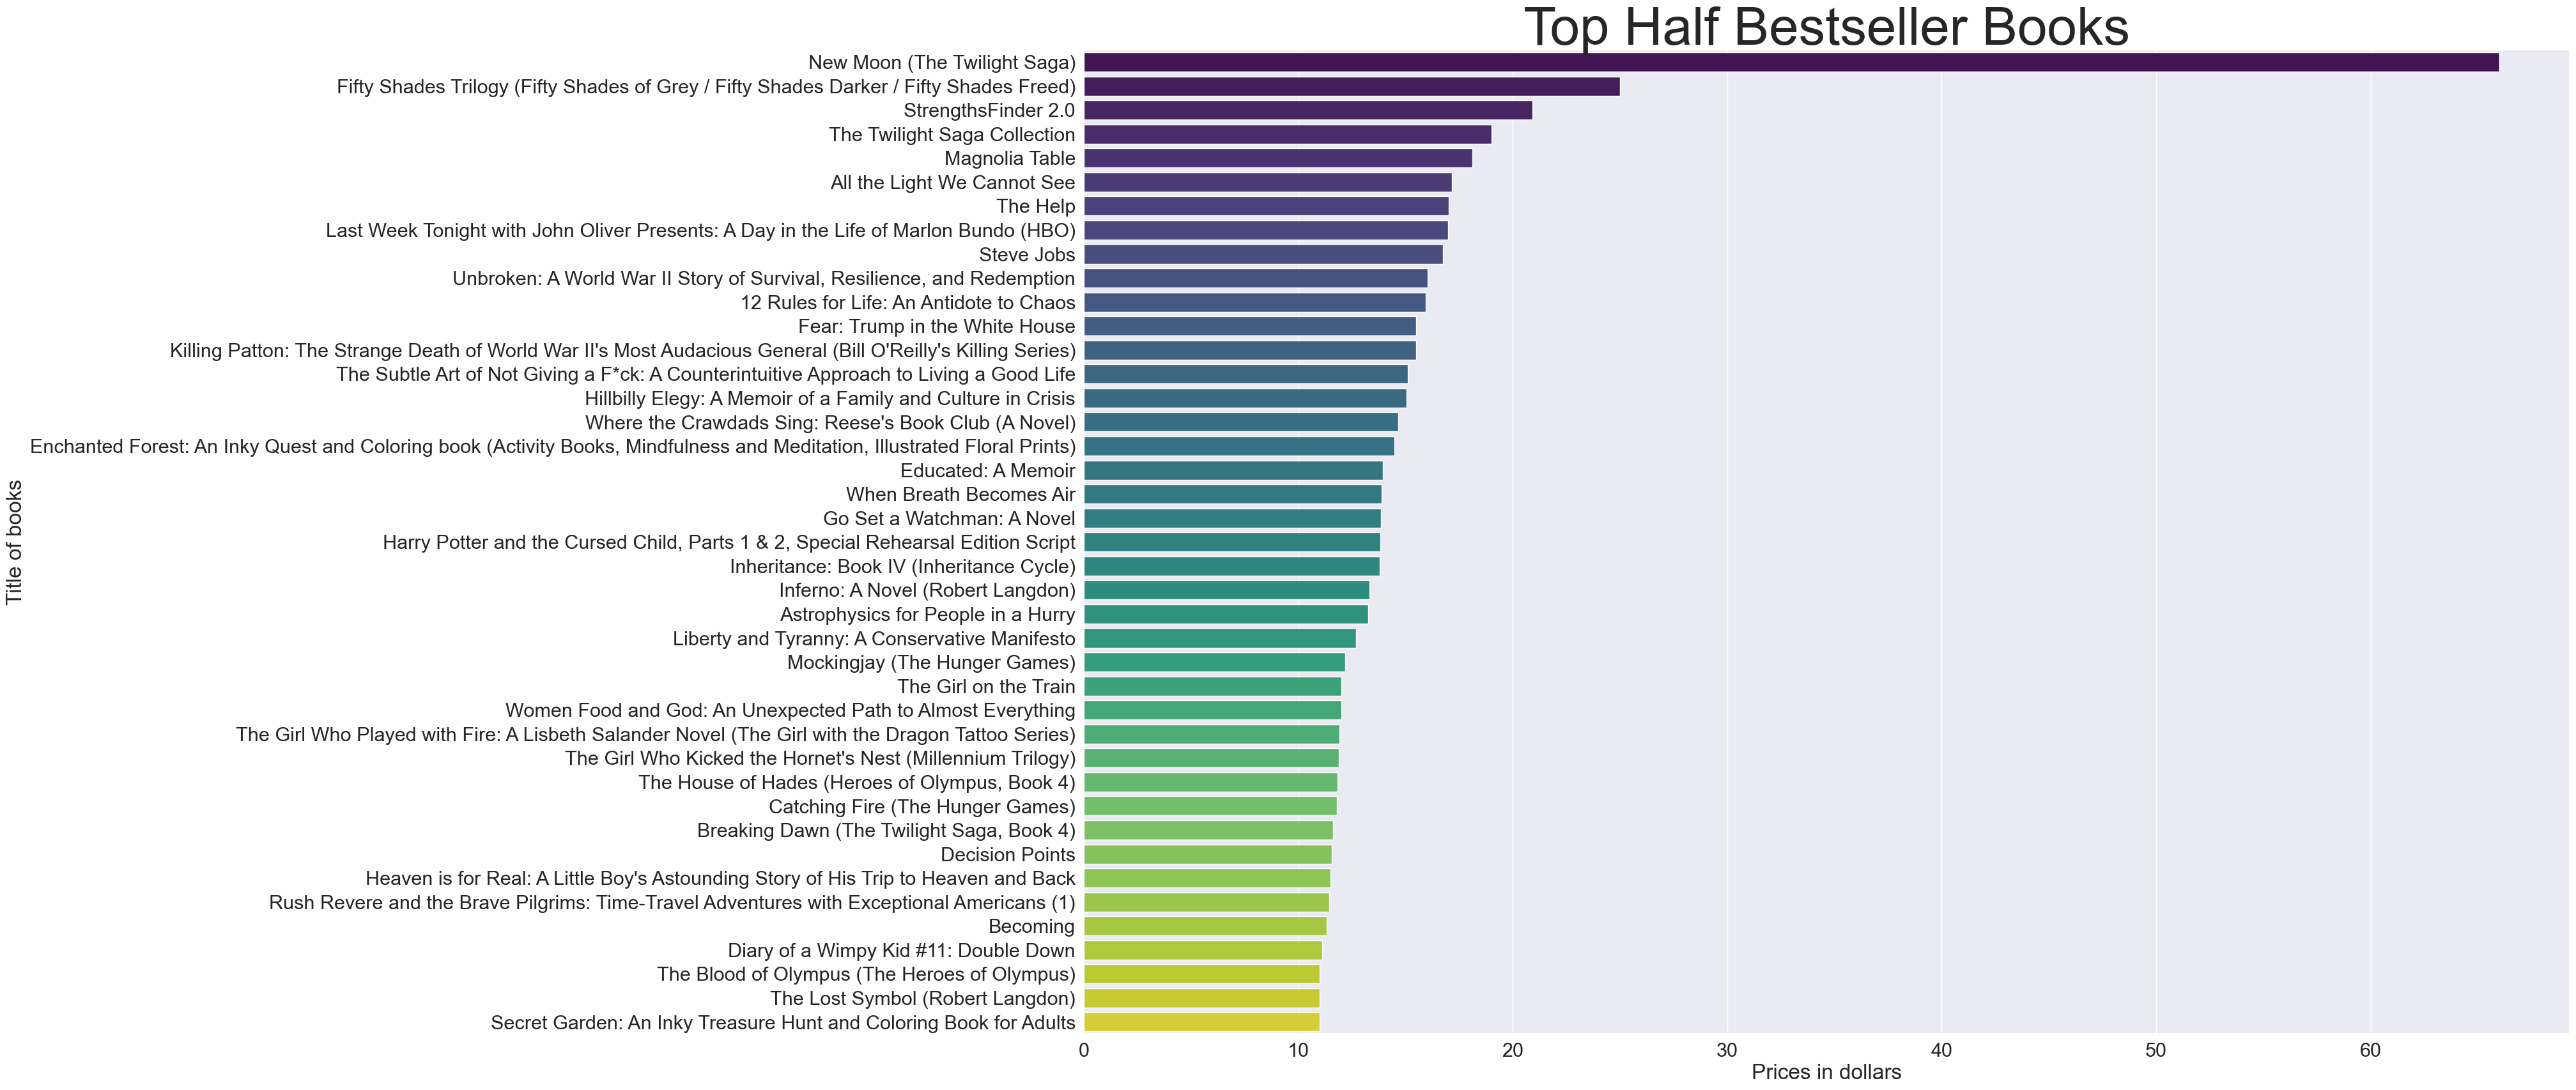

In [29]:
#plot
sns.set(font_scale=2)
plt.figure(figsize=(30,20))
sns.barplot(x='prices',y='book_title',data=prices_sort[:41],errorbar=None,palette='viridis')
plt.title('Top Half Bestseller Books',fontsize=60)
plt.xlabel('Prices in dollars')
plt.ylabel('Title of books')


Text(0, 0.5, 'Title of books')

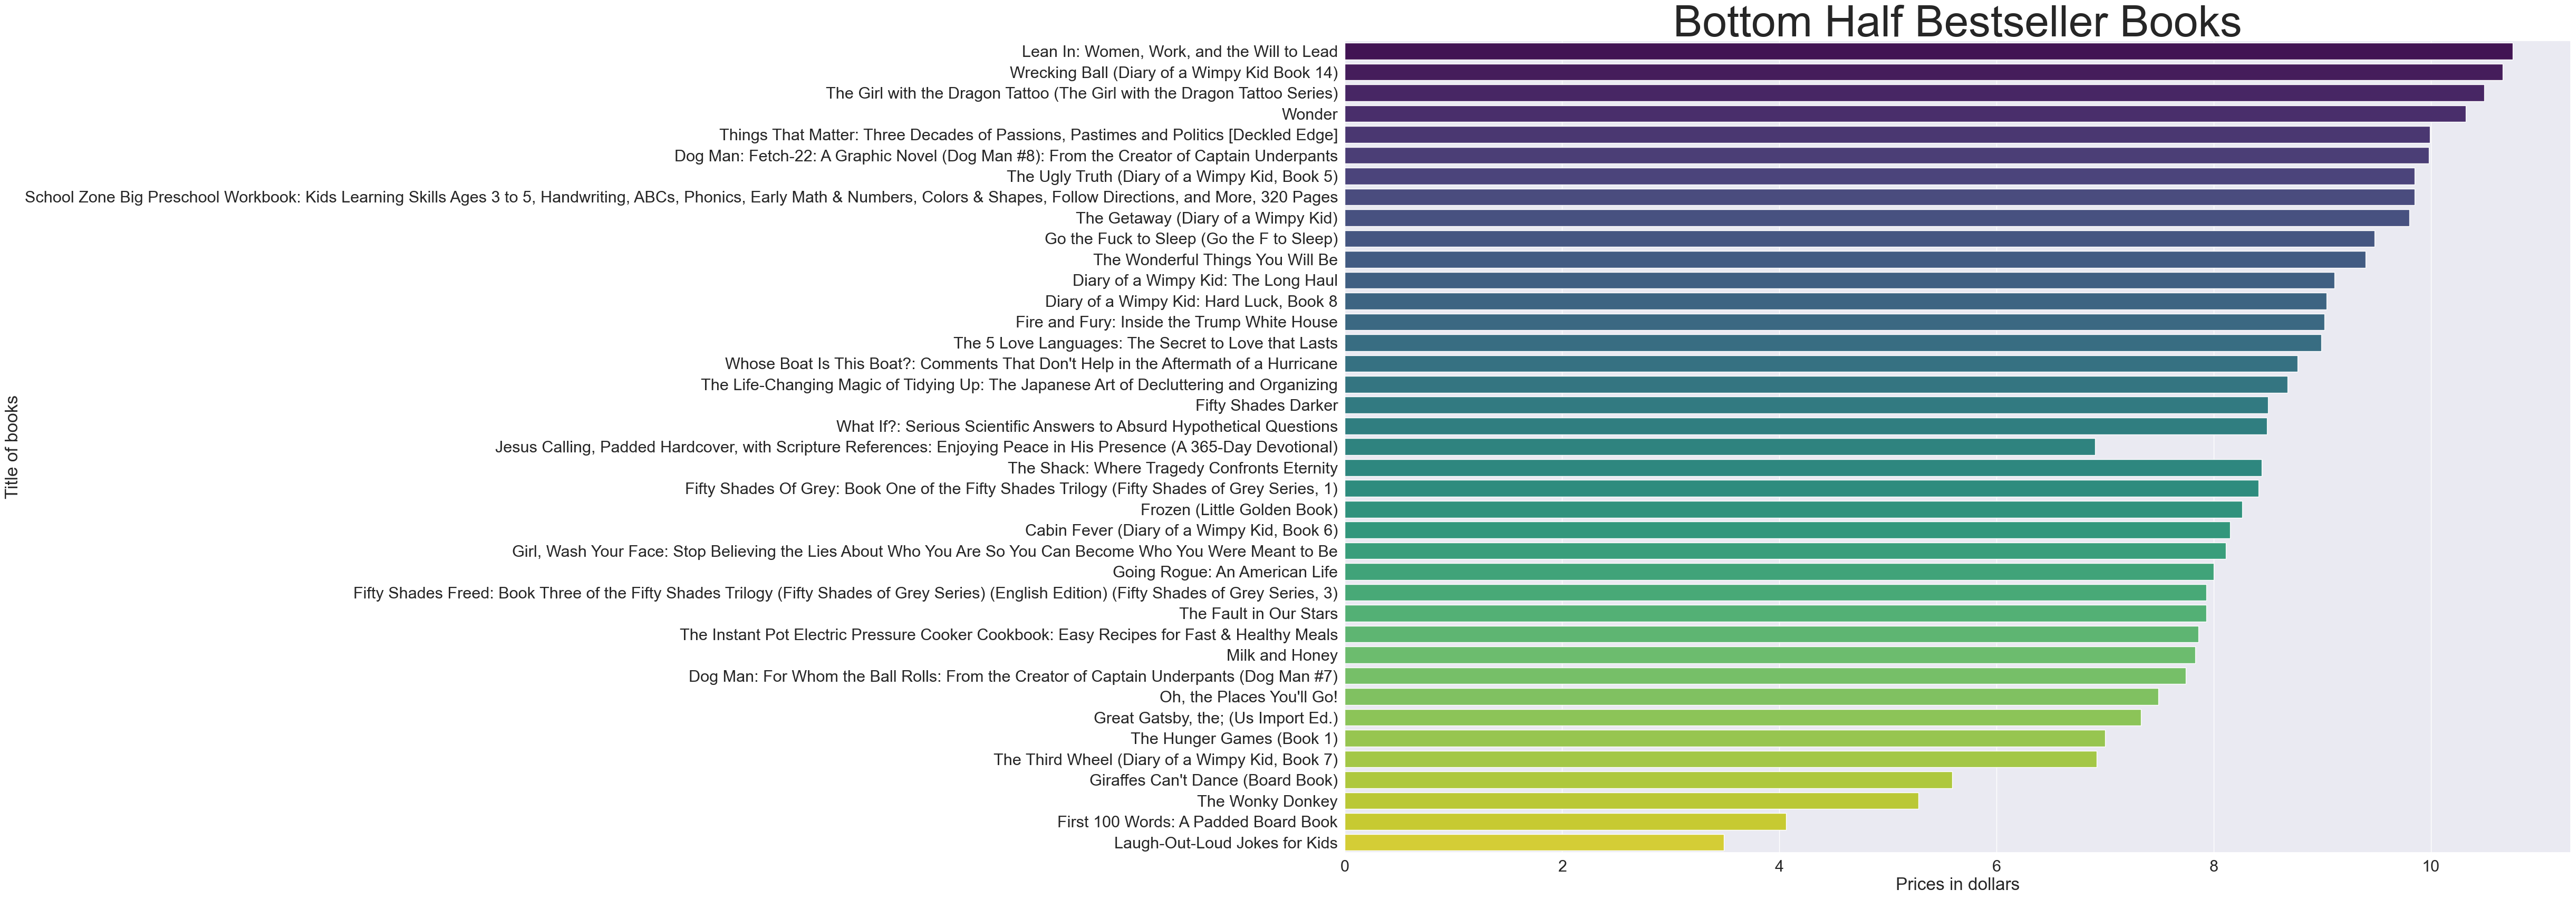

In [30]:
sns.set(font_scale=2)
plt.figure(figsize=(30,20))
sns.barplot(x='prices',y='book_title',data=prices_sort[41:],errorbar=None,palette='viridis')
plt.title('Bottom Half Bestseller Books',fontsize=60)
plt.xlabel('Prices in dollars')
plt.ylabel('Title of books')


# Analysis II

In [31]:
#Top and least selling authors
df_authors = pd.DataFrame(df_books['author'].value_counts().sort_values(ascending=False))
df_authors['authors'] = df_authors.index

In [32]:
df_authors.reset_index(inplace=True)
df_authors.drop(columns=['author'],inplace=True)

Text(0.5, 0, 'Number of books')

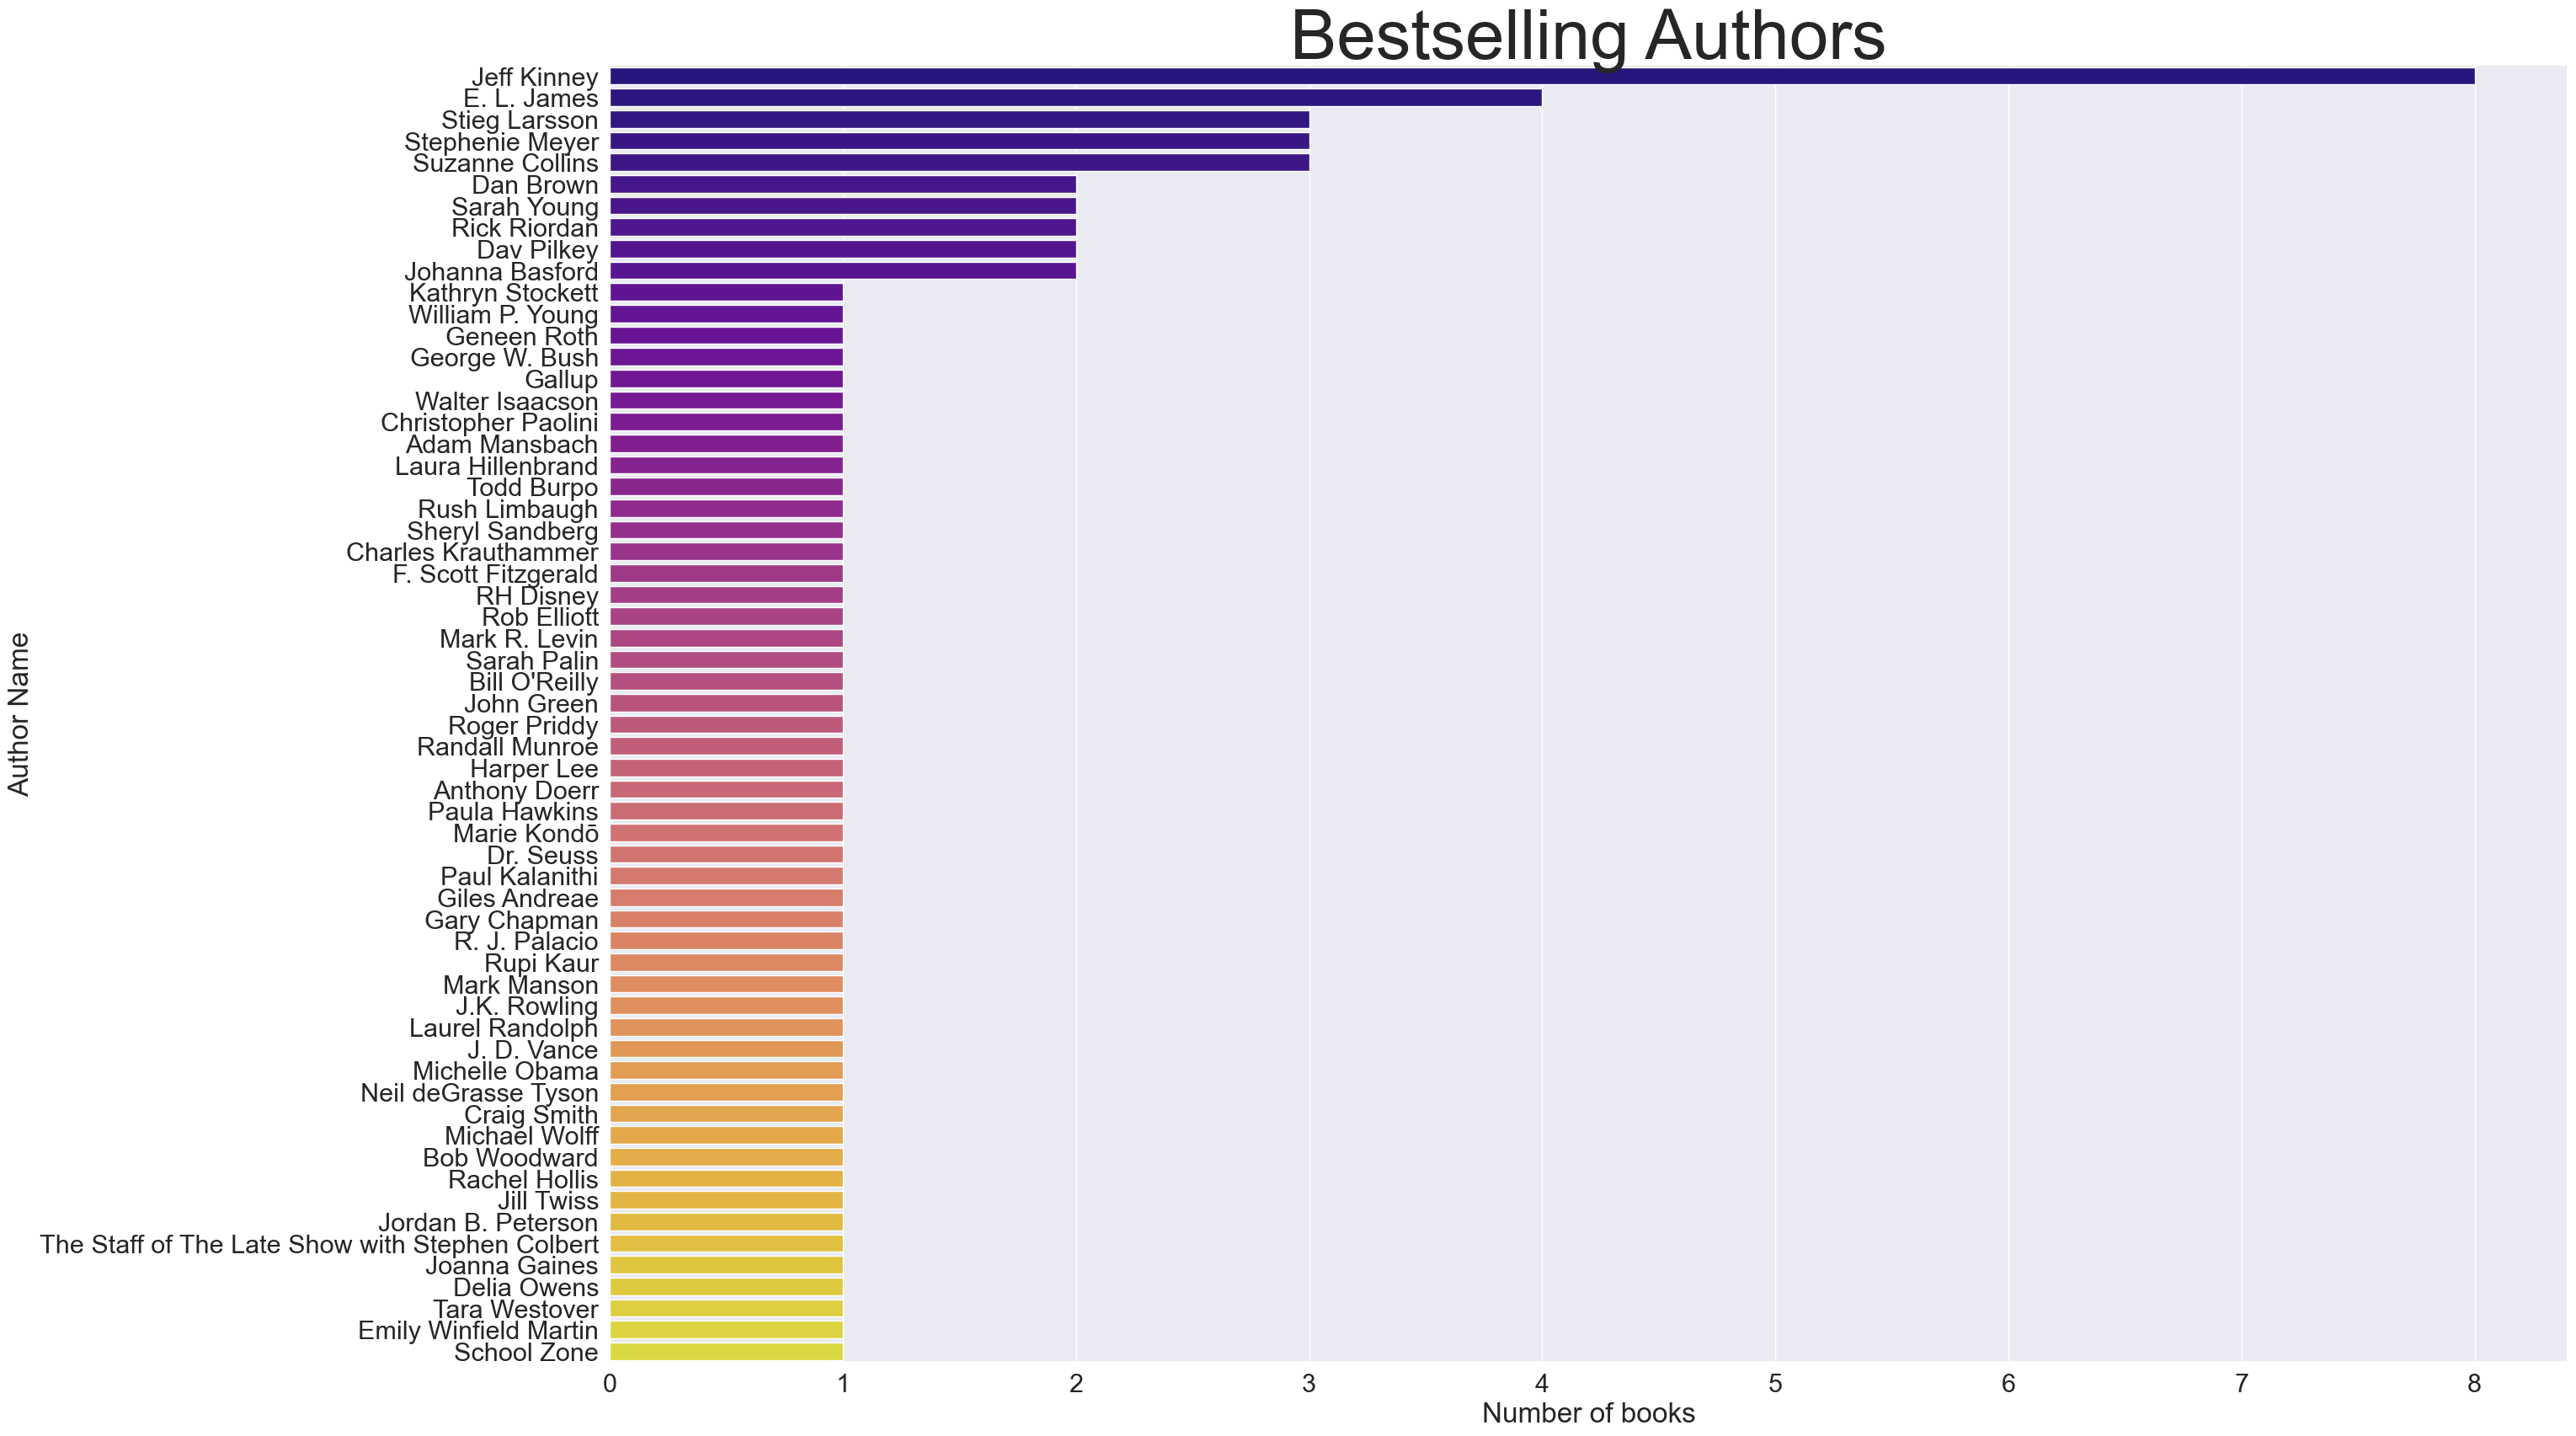

In [33]:
sns.set(font_scale=2)
plt.figure(figsize=(30,20))
sns.barplot(x='count',y='authors',data=df_authors,palette='plasma')
plt.title('Bestselling Authors',fontsize=60)
plt.ylabel('Author Name')
plt.xlabel('Number of books')


In [34]:
df_jeff = df_books[df_books['author']=='Jeff Kinney'].sort_values(by='prices')

In [35]:
df_jeff

,book_title,author,publisher,pages,prices
35,"The Third Wheel (Diary of a Wimpy Kid, Book 7)",Jeff Kinney,Harry N. Abrams,224,6.92
20,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,Harry N. Abrams,224,8.15
38,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,Harry N. Abrams,224,9.04
49,Diary of a Wimpy Kid: The Long Haul,Jeff Kinney,Amulet Books,217,9.11
76,The Getaway (Diary of a Wimpy Kid),Jeff Kinney,Harry N. Abrams,224,9.80
14,"The Ugly Truth (Diary of a Wimpy Kid, Book 5)",Jeff Kinney,Harry N. Abrams,224,9.85
96,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,Harry N. Abrams,224,10.66
68,Diary of a Wimpy Kid #11: Double Down,Jeff Kinney,Harry N. Abrams,224,11.12


In [75]:
# Creating an Altair chart
chart = alt.Chart(df_jeff).mark_line(point=True).encode(
    x=alt.X('book_title:N', sort=None, title='Book Title', axis=alt.Axis(labelAngle=-45)),  # Categorical x-axis with no sorting and rotated labels for readability
    y=alt.Y('prices:Q', title='Prices in USD'),  # Quantitative y-axis with a descriptive title
    tooltip=[alt.Tooltip('book_title', title='Book Title'), alt.Tooltip('prices', title='Price ($)')]  # Tooltips to show book title and price on hover
).interactive().properties(
    width=800,  # Set the width of the chart
    height=400,  # Set the height of the chart
    title='Price Distribution of Jeff Kinney\'s Books'  # Title of the chart
).configure_axis(
    labelFontSize=12,  # Set font size for axis labels
    titleFontSize=14  # Set font size for axis titles
).configure_title(
    fontSize=16,  # Set font size for the chart title
    anchor='start',  # Align the title to the start (left)
    fontWeight='bold'  # Make the title bold
)

# Display the chart
chart




/Users/kwasio/opt/anaconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

/var/folders/nv/b5s6cmxs43701ftnzc7yftgm0000gp/T/ipykernel_85588/1632614530.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(data=df_jeff, x='prices', color='purple', shade=True, bw_adjust=0.5, linewidth=2.5)
/Users/kwasio/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


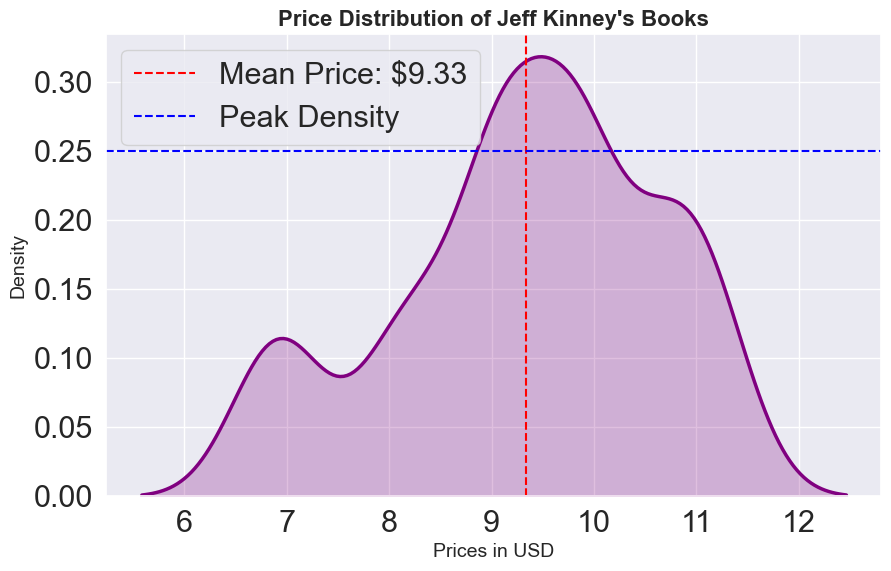

In [71]:


plt.figure(figsize=(10, 6))  # Set the figure size
ax = sns.kdeplot(data=df_jeff, x='prices', color='purple', shade=True, bw_adjust=0.5, linewidth=2.5)

# Adding titles and labels
ax.set_title('Price Distribution of Jeff Kinney\'s Books', fontsize=16, fontweight='bold')
ax.set_xlabel('Prices in USD', fontsize=14)
ax.set_ylabel('Density', fontsize=14)

# Adding vertical and horizontal lines for mean price and peak density
mean_price = df_jeff['prices'].mean()
ax.axvline(mean_price, color='red', linestyle='--', linewidth=1.5, label=f'Mean Price: ${mean_price:.2f}')
ax.axhline(0.25, color='blue', linestyle='--', linewidth=1.5, label='Peak Density')

# Adding legend
ax.legend()

# Display the plot
plt.show()